# 2.1

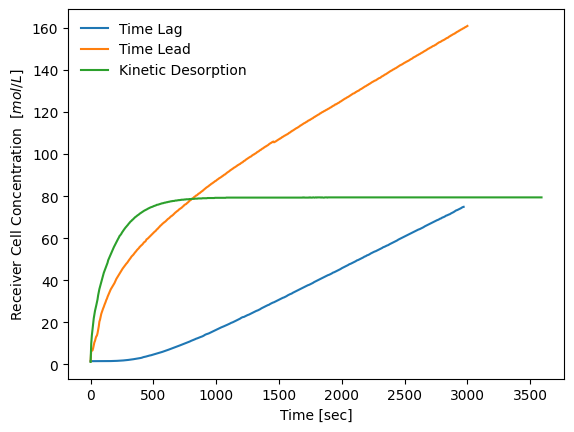

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_excel("/Users/mohan/Desktop/UVA/Y5S2/mass_transfer/mass_hw2.xlsx", skiprows = 1)

def draw_line(slope, intercept, input):
    return slope * input + intercept

c1 = 9.52 * 10**(-6) # empirical coefficient to go from conductivity to concentration

lag_time = data.iloc[:, 0].dropna()
lag_concentration = data.iloc[:, 1].dropna() * c1

lead_time = data.iloc[:, 2].dropna()
lead_concentration = data.iloc[:, 3].dropna() * c1

desorption_time = data.iloc[:, 4].dropna()
desorption_concentration = data.iloc[:, 5].dropna() * c1

plt.plot(data.iloc[:, 0], data.iloc[:, 1], label = "Time Lag")
plt.plot(data.iloc[:, 2], data.iloc[:, 3], label = "Time Lead")
plt.plot(data.iloc[:, 4], data.iloc[:, 5], label = "Kinetic Desorption")
plt.xlabel("Time [sec]")
plt.ylabel(r"Receiver Cell Concentration  [$mol / L$]")
plt.legend(frameon = False)
plt.show();

Slope: 2.8632106038291593e-07, Intercept: -0.00013746154933726043, r^2: 0.9999802718153089
x-intercept (time lag): 480.10 seconds


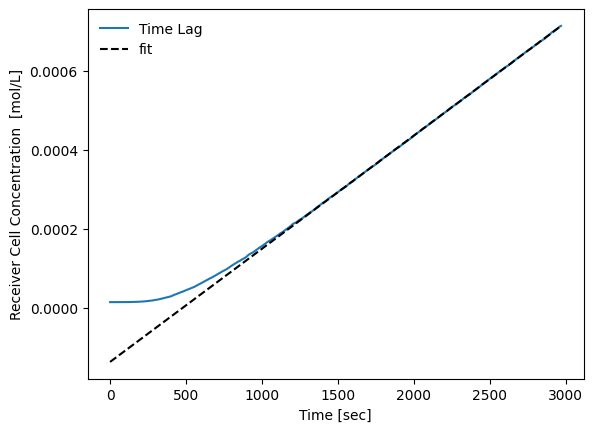

In [120]:
import scipy 

lag_exclude = 200 # number of points to exclude

lag_slope, lag_intercept, lag_r_value, lag_p_value, std_err = scipy.stats.linregress(lag_time[lag_exclude:], lag_concentration[lag_exclude:])

theta_lag = lag_intercept/(-lag_slope)

print(f"Slope: {lag_slope}, Intercept: {lag_intercept}, r^2: {lag_r_value}")

print(f"x-intercept (time lag): {theta_lag:.2f} seconds") # ANSWER

lag_line = draw_line(slope = lag_slope, intercept = lag_intercept, input=lag_time)

plt.plot(lag_time, lag_concentration, label = "Time Lag")
plt.plot(lag_time, lag_line, color = 'k', label = 'fit', linestyle = '--')
plt.xlabel("Time [sec]")
plt.ylabel(r"Receiver Cell Concentration  [mol/L]")
plt.legend(frameon = False)
plt.show();

# Q2.1b

Permeability: 2.758441915925404e-07
The permeability coefficient is 2.758e-07 [cm^2/s], found from the slope of the line above


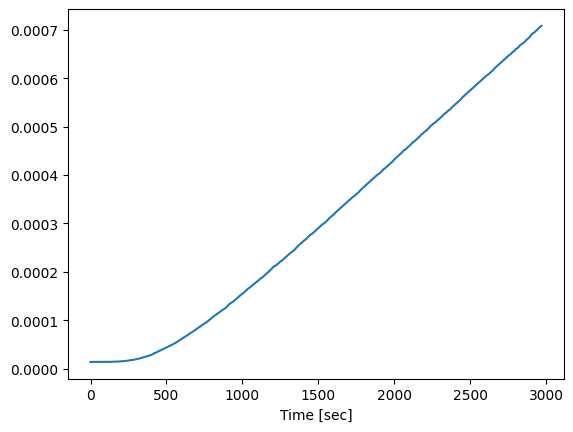

In [121]:
L_lag = 0.062 # cm

def permeability(Cr, L):
    V = 32 # cm^2
    A = 2 # cm^2
    Cd = 1 # mol/L
    return - (V*L)/(2 * A) * np.log(1 - (2 * Cr/Cd))

lag_perm = permeability(Cr = lag_concentration, L = L_lag)

lag_perm_slope, lag_perm_intercept, lag_perm_r_value, lag_perm_p_value, std_err = scipy.stats.linregress(lag_time[50:], lag_perm[50:])

P_lag = lag_perm_slope

print(f"Permeability: {P_lag}") # ANSWER

print(f"The permeability coefficient is {(P_lag):.3e} [cm^2/s], found from the slope of the line above")

plt.plot(lag_time, lag_perm)
plt.xlabel("Time [sec]")
plt.show();


# Q2.1c

In [122]:
# L_lag = 0.062 # cm

D_lag = L_lag**2 / (6*theta_lag)

Ks_lag = P_lag/D_lag

print(f"Lag Time Data:\n----------------\nPermeability (P): {P_lag:.3e} [cm^2/sec]\nPartition Coeff (K): {Ks_lag:.3f}\nDiffusion (D): {D_lag:.3e} [cm^2/sec]") # ANSWER

Lag Time Data:
----------------
Permeability (P): 2.758e-07 [cm^2/sec]
Partition Coeff (K): 0.207
Diffusion (D): 1.334e-06 [cm^2/sec]


# Q2.1d

From the hint, we know 

$$ Q_t = \frac{D C_1}{L} \left( t + L^2 / 3D \right) $$

which means we must divide the x-intercept by 2 to get $\theta$ for the lead system

$$ 2 \theta = \frac{L^2}{3 D} $$

Slope: 3.773841827794236e-07, Intercept: 0.0004313383182284455, r^2: 0.9964783280206307
x-intercept (time lag): 571.48 seconds


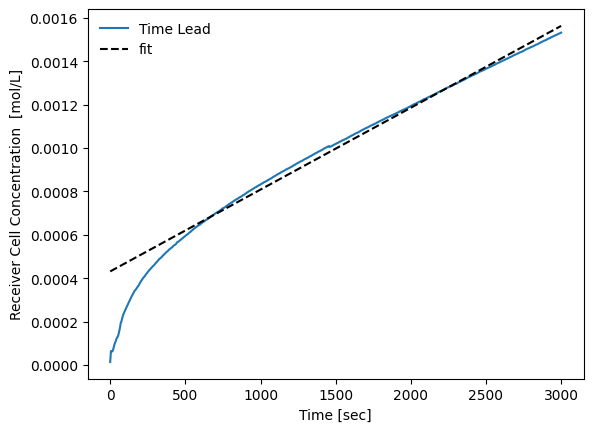

In [123]:
L_lead = 0.065 # cm

lead_exclude = 50 # number of points to exclude

lead_slope, lead_intercept, lead_r_value, lead_p_value, std_err = scipy.stats.linregress(lead_time[lead_exclude:], lead_concentration[lead_exclude:])

theta_lead = lead_intercept/(lead_slope) * 0.5 # multiply x-intercept by 1/2

print(f"Slope: {lead_slope}, Intercept: {lead_intercept}, r^2: {lead_r_value}")

print(f"x-intercept (time lag): {theta_lead:.2f} seconds") # ANSWER

lead_line = draw_line(slope = lead_slope, intercept = lead_intercept, input=lead_time)

plt.plot(lead_time, lead_concentration, label = "Time Lead")
plt.plot(lead_time, lead_line, color = 'k', label = 'fit', linestyle = '--')
plt.xlabel("Time [sec]")
plt.ylabel(r"Receiver Cell Concentration  [mol/L]")
plt.legend(frameon = False)
plt.show();

In [124]:
lead_perm = permeability(Cr = lead_concentration, L = L_lead) # change Cr to use lead concentration data

lead_perm_slope, lead_perm_intercept, lead_perm_r_value, lead_perm_p_value, std_err = scipy.stats.linregress(lead_time[200:], lead_perm[200:])

P_lead = lead_perm_slope

D_lead = L_lead**2 / (6*(theta_lead))

Ks_lead = P_lead/D_lead

print(f"Lag Time Data:\n----------------\nPermeability (P): {P_lag:.3e} [cm^2/sec]\nPartition Coeff (K): {Ks_lag:.3f}\nDiffusion (D): {D_lag:.3e} [cm^2/sec]") # ANSWER

print(f"\n \nLead Time Data:\n----------------\nPermeability: {P_lead:.3e} [cm^2/sec]\nPartition Coeff: {Ks_lead:.3f}\nDiffusion: {D_lead:.3e} [cm^2/sec]") # ANSWER

Lag Time Data:
----------------
Permeability (P): 2.758e-07 [cm^2/sec]
Partition Coeff (K): 0.207
Diffusion (D): 1.334e-06 [cm^2/sec]

 
Lead Time Data:
----------------
Permeability: 3.608e-07 [cm^2/sec]
Partition Coeff: 0.293
Diffusion: 1.232e-06 [cm^2/sec]


In [125]:
diffus_difference = np.abs((D_lead)/(D_lag))*100

permeability_difference = np.abs((P_lead)/(P_lag))*100

partition_difference = np.abs((Ks_lead)/(Ks_lag)) * 100

print(f"Percentage Differences (lead/lag):\n-------------\nDiffusion (D): {diffus_difference}\nPermeability (P): {permeability_difference}\nPartition Coeff (Ks): {partition_difference}")

Percentage Differences (lead/lag):
-------------
Diffusion (D): 92.33512123499197
Permeability (P): 130.81131417510414
Partition Coeff (Ks): 141.67016020067882


# Written Response for Q2.1d

Given the percent differences between lead and lag data are greater than 10%, permeability, diffusion, and partition coefficient vary significantly when operated in a time lead configuration.

# Q2.2a

The characteristic time scale for desorption is set by the diffusion timescale,

$$\tau \sim \frac{L^2}{D} $$

wehre L = 0.058 cm and D $\sim 10^{-6}$ from the previous questions involving the lead/lag data.

In [101]:
print(f"The timescale is ~ {0.058**2/(10**(-6)):.0f} [seconds]")

The timescale is ~ 3364 [seconds]


# 2.2b

Use 

$$ \frac{M_t}{M_{\infty}} = \frac{4}{\sqrt{\pi}} \sqrt{\frac{D_s t}{L^2}} $$

as the short-time, linear approximation then find $D_s$. 

The diffusion coefficient determined from the short time approximation is 1.86e-06 cm^2/sec


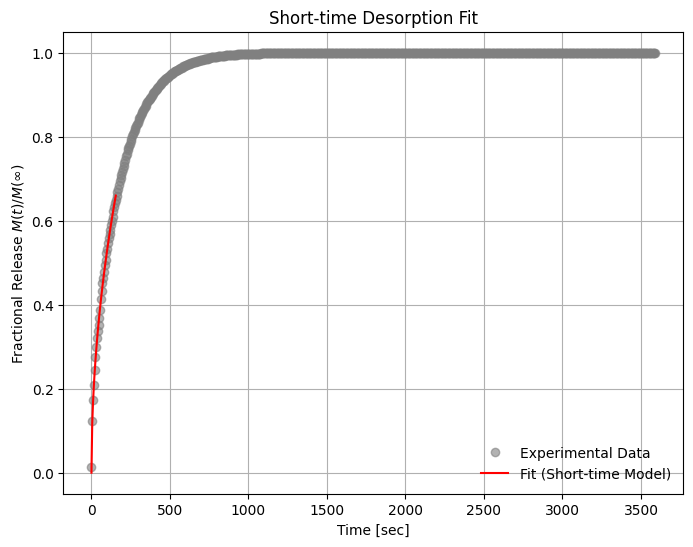

In [102]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data from the Excel file
file_path = "/Users/mohan/Desktop/UVA/Y5S2/mass_transfer/mass_hw2.xlsx"
data = pd.read_excel(file_path)

# Extract relevant columns for Kinetic Desorption
time = pd.to_numeric(data['XLPEGDA Kinetic Desorption'][1:], errors='coerce').dropna().astype(float)
conductivity = pd.to_numeric(data['Unnamed: 5'][1:], errors='coerce').dropna().astype(float)

# Convert conductivity to concentration using the given constant
c1 = 9.52e-6  # Empirical constant
concentration = c1 * conductivity

# Calculate fractional release by normalizing with the last value
M_inf = concentration.iloc[-1]
fractional_release = concentration / M_inf

# Define the short-time linear-approximation model
def short_time_model(t, D_s):
    L = 580e-4  # Thickness in cm (580 µm)
    return (4 / np.sqrt(np.pi)) * (D_s * t / L**2)**0.5

two_thirds_Mt_Minf_index = np.abs(fractional_release - (2/3)).argmin() # find index corresponding to M_t/M_inf ~ 2/3 

short_time_data = time[time < time[two_thirds_Mt_Minf_index]] # find the time range corresponding to M_t/M_inf = [0, 2/3]
fractional_release_short = fractional_release[:len(short_time_data)]

# Fit the model to the short-time data
popt, pcov = curve_fit(short_time_model, short_time_data, fractional_release_short)
D_s = popt[0]

# Output the calculated diffusion coefficient
print(f"The diffusion coefficient determined from the short time approximation is {D_s:.2e} cm^2/sec")

plt.figure(figsize=(8, 6))
plt.plot(time, fractional_release, 'o', label='Experimental Data', color = 'gray', alpha = 0.6)
plt.plot(short_time_data, short_time_model(short_time_data, D_s), '-', label='Fit (Short-time Model)', color = 'r')
plt.xlabel('Time [sec]')
plt.ylabel(r'Fractional Release $M(t)/M(\infty)$')
plt.legend(frameon = False)
plt.title(f'Short-time Desorption Fit')
plt.grid(True)
plt.show()

# 2.2c

Use the same $D_s$ value determined in the previous question for the full solution

$$\frac{M_t}{M_{\infty}} = 1 - \sum_{0}^{n = \infty} \frac{8}{(2n +1)^2 \pi^2} exp[- D(2n+1)^2 \pi^2 t/ 4L^2]$$

The amount of time for a 10% deviation is 305.0 seconds!!!


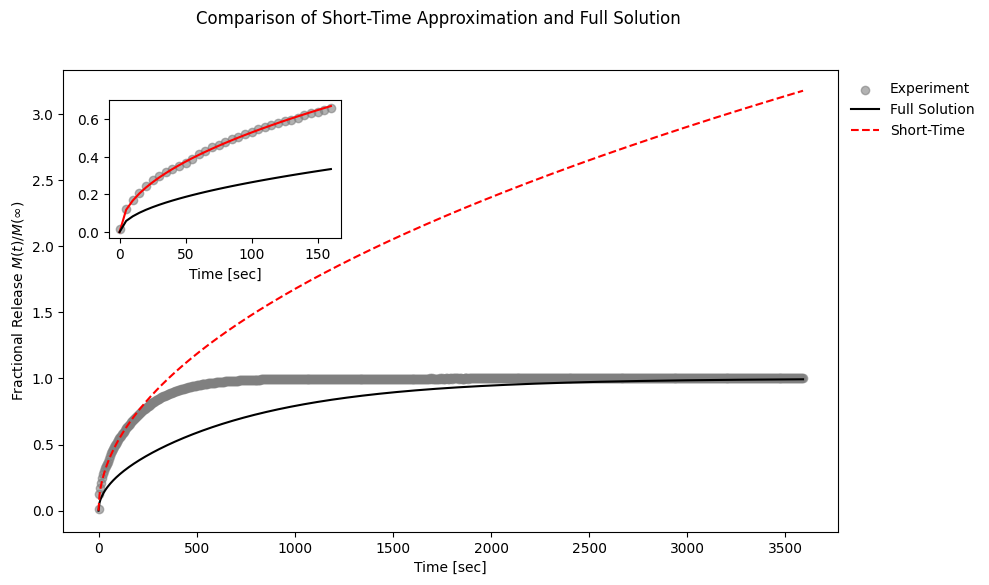

In [127]:
def full_solution(t, D_s, L, terms):
    M_t_M_inf = np.zeros_like(t)
    for n in range(terms):
        M_t_M_inf += (1 / (2*n+1)**2) * np.exp(- (2*n+1)**2 * np.pi**2 * D_s * t / (4 * L**2))
    return 1 - (8 / np.pi**2) * M_t_M_inf

n = 800

full_sol = full_solution(time, D_s, L = 0.058, terms = n)
short_sol = short_time_model(time, D_s) # use short time equation over whole time domain, not just M_t/M_inf = [0, 2/3]

# percent_deviation = np.abs(full_sol - short_sol) / full_sol * 100

percent_deviation = np.abs(fractional_release[1:] - short_sol[1:]) / fractional_release[1:] * 100

# Find the time where deviation exceeds 10%
deviation_limit = 10  # Percent
deviation_exceed_idx = np.where(percent_deviation > deviation_limit)[0]
deviation_time = time.iloc[deviation_exceed_idx[0]] if len(deviation_exceed_idx) > 0 else None

# Output the time where deviation exceeds 10%
print(f"The amount of time for a 10% deviation is {deviation_time} seconds!!!")

# Plot the comparison
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(time, fractional_release, color = 'gray', alpha = 0.6, label = "Experiment")
ax.plot(time, full_sol, label='Full Solution', color='k')
ax.plot(time, short_sol, label='Short-Time', color='red', linestyle='--')
ax.set_xlabel('Time [sec]')
ax.set_ylabel(r'Fractional Release $M(t)/M(\infty)$')
ax.legend(frameon = False, bbox_to_anchor=(1.0, 1.0))

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

inset_ax = inset_axes(ax, width="30%", height="30%", loc="upper left", bbox_to_anchor=(0.05, -0.05, 1, 1), bbox_transform=ax.transAxes)  # Use the parent axis's coordinate system)  # Inset position
inset_ax.plot(time[0:two_thirds_Mt_Minf_index], short_sol[0:two_thirds_Mt_Minf_index], color='r', label="Short-Time")
inset_ax.plot(time[0:two_thirds_Mt_Minf_index], full_sol[0:two_thirds_Mt_Minf_index], label = "Full-Time Solution", color = 'k')
inset_ax.scatter(time[0:two_thirds_Mt_Minf_index], fractional_release[0:two_thirds_Mt_Minf_index], color = 'gray', alpha = 0.6, label = "Experiment")
inset_ax.set_xlabel("Time [sec]")
plt.suptitle('Comparison of Short-Time Approximation and Full Solution')
# plt.tight_layout()
# plt.savefig("/Users/mohan/Desktop/comapare.png", dpi = 400)
plt.show()

Given the 10% deviation happens around 300 seconds, the guideline of $M_t/M_{\infty}$ seems reasonable as the time associated with that is ~165 seconds.

# 2.2d

The model is not perfect given the deviation from experimental data at short to intermediate times. 

# 2.3

For a binary system,

$$ln(\gamma_1) = Ax_2^2 $$
$$ \gamma_1 = exp[A x_2^2] $$
$$ \gamma_1 = exp[A (1 - x_1)^2] $$

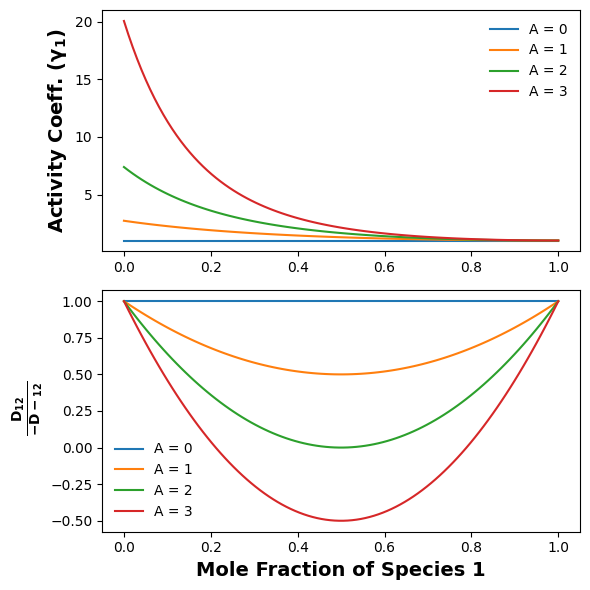

In [116]:
mole_frac_one = np.linspace(0, 1, 100)

def activity_coeff(A, x1):
    return np.exp(A * (1 - x1)**2)

def normalized_diffusion(A, x1):
    return 1 - ((2 * A * x1) * (1 - x1))

fig, ax = plt.subplots(2, 1, figsize = (6, 6))
for A in range(4): # range of 4 means [0, 1, 2, 3]
    ax[0].plot(mole_frac_one, activity_coeff(A, mole_frac_one), label = f"A = {A}")
    ax[1].plot(mole_frac_one, normalized_diffusion(A, mole_frac_one), label = f"A = {A}")
ax[0].legend(frameon = False)
ax[1].legend(frameon = False)
ax[1].set_xlabel("Mole Fraction of Species 1", fontsize = 14, weight = 'bold')
ax[0].set_ylabel(r"Activity Coeff. ($\mathbf{\gamma_1}$)", fontsize = 14, weight = 'bold')
ax[1].set_ylabel(r" $ \mathbf{\frac{D_{12}}{-D-_{12}}} $", fontsize = 14)
plt.tight_layout()
# plt.savefig("/Users/mohan/Desktop/hw_q2-3.png", dpi = 400)
plt.show();

# 2.3c

Some values of $\frac{D_{12}}{-D-_{12}}$ are negative which is highly unpyhsical, suggesting some deviation from ideality. One possible explanation is that the mixture is separation, leading to strange deviations for certain $X_1$.